## Imports

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import os

## Data Loading

In [110]:
pingouins = sns.load_dataset("penguins")
pingouins.head()

if not os.path.exists("../data"):
    os.makedirs("../data")

# Drop the island column becuase it's exactly the target variable in disguise
pingouins.drop(columns=["island"], inplace=True)
pingouins.to_csv("../data/pingouins.csv", index=False)
pingouins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,Male
1,Adelie,39.5,17.4,186.0,3800.0,Female
2,Adelie,40.3,18.0,195.0,3250.0,Female
3,Adelie,NaN,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0,Female


## Exploratory Data Analysis (EDA) 

In [111]:
pingouins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.3+ KB


### Missing Values & Duplicates

In [112]:
n_na = pingouins.isna().sum()
print("Missing Values : ")
print(n_na)
#pingouins.dropna(inplace=True)
print("🚫 I don't drop the NAN i will Impute them later... ")
n_duplicates = pingouins.duplicated().sum()
print(f"duplicates : {n_duplicates}")
pingouins.drop_duplicates(inplace=True)
print("✅ Duplicates have been dropped.")

Missing Values : 
species               0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
🚫 I don't drop the NAN i will Impute them later... 
duplicates : 0
✅ Duplicates have been dropped.


### Visualizations 
#### Univariate Analysis

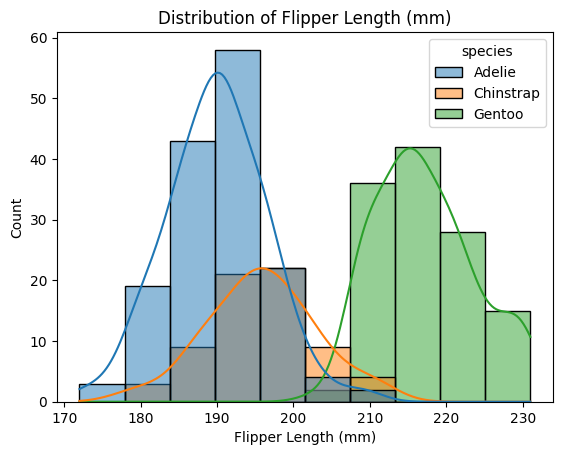

In [113]:
# For 1 column
sns.histplot(data=pingouins, x="flipper_length_mm", kde=True, hue="species")
plt.title("Distribution of Flipper Length (mm)")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Count")
plt.show()

## Multivariate Analysis

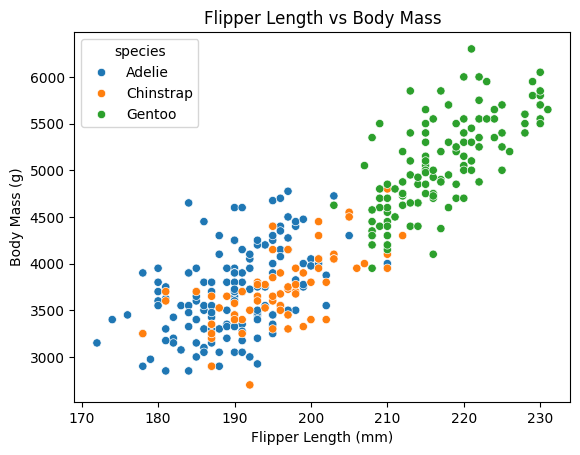

In [114]:
sns.scatterplot(data=pingouins, x="flipper_length_mm", y="body_mass_g", hue="species")
plt.title("Flipper Length vs Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

In [115]:
##

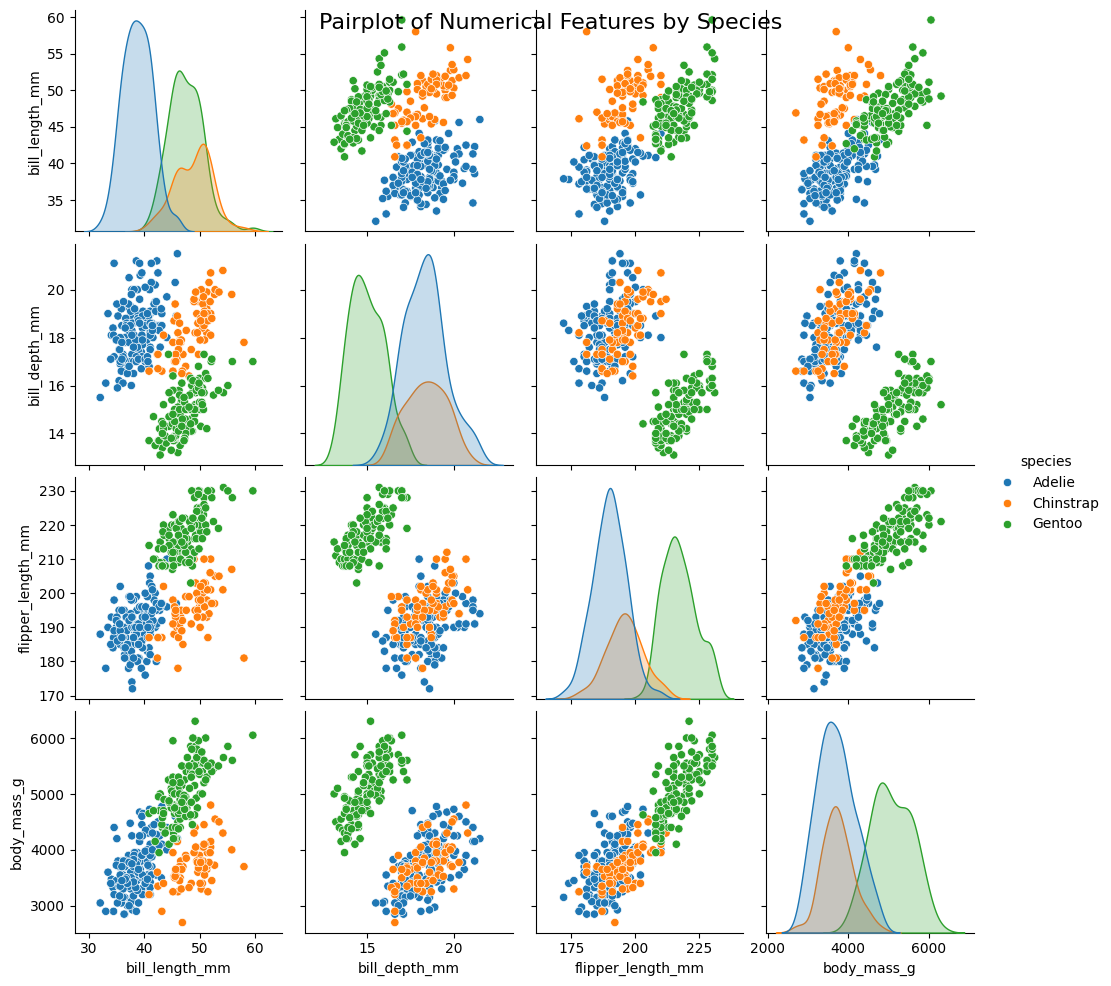

In [116]:
# For all numerical columns
# With Pandas
# pingouins.hist(bins=15, figsize=(15, 10), layout=(2, 3))
# plt.suptitle("Distributions of Numerical Features", fontsize=16)
# plt.show()
# With Seaborn
sns.pairplot(pingouins, hue="species", diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features by Species", fontsize=16)
plt.show()

In [117]:
# Bonus Interactive Plotly Visualization
px.scatter_3d(
    pingouins,
    x="flipper_length_mm",
    y="bill_length_mm",
    z="body_mass_g",
    color="species",
    title="3D Scatter Plot of Penguin Features",
    labels={
        "flipper_length_mm": "Flipper Length (mm)",
        "bill_length_mm": "Bill Length (mm)",
        "body_mass_g": "Body Mass (g)",
    },
).show()

## Preprocessing
#### Train-Test Split

In [118]:
from sklearn.model_selection import train_test_split    

y = pingouins.pop("species")
X = pingouins
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (275, 5)
X_test shape: (69, 5)
y_train shape: (275,)
y_test shape: (69,)


In [119]:
X_train_cat = X_train[["sex"]]
X_train_num = X_train.drop(columns=["sex"])
X_test_cat = X_test[["sex"]]
X_test_num = X_test.drop(columns=["sex"])


#### Numerical Preprocessing

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Imputing
simple = SimpleImputer(strategy="most_frequent")
simple.fit(X_train_num)
X_train_num =  simple.transform(X_train_num)
X_test_num =  simple.transform(X_test_num)
# Scaling
standard = StandardScaler().set_output(transform="pandas")
standard.fit(X_train_num)
X_train_num_preproc = standard.transform(X_train_num)
X_test_num_preproc = standard.transform(X_test_num)
X_train_num_preproc

,x0,x1,x2,x3
0,-1.999040,-0.533776,-1.640910,-1.633343
1,-0.811981,1.762133,-0.705453,-0.385910
2,-1.524216,-0.084577,-0.849369,-1.071998
3,1.087312,-0.633598,1.669170,1.422867
4,1.069050,-0.533776,0.877629,1.485238
...,...,...,...,...
270,-1.140705,-0.034666,-1.065244,-1.134370
271,0.375077,-1.032887,1.021546,1.111009
272,-0.227583,0.664089,-0.417620,0.050691
273,-1.341592,0.813823,-0.993286,-0.510653


TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.ndarray'>.

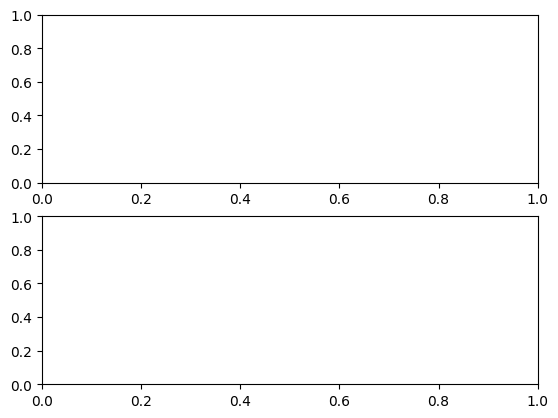

In [127]:
# Bonus : Vérifions que la distrivbytion est inchangé
fig, ax = plt.subplots(2,1)
sns.histplot(X_train_num,x="bill_length_mm", ax=ax[0])
sns.histplot(X_train_num_preproc,x="bill_length_mm", ax = ax[1])

#### Categorical preprocessing

In [128]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
# Imputing
simple = SimpleImputer(strategy="most_frequent")
simple.fit(X_train_cat)
X_train_cat =  simple.transform(X_train_cat)
X_test_cat =  simple.transform(X_test_cat)
# Encoding 
ohe = OneHotEncoder(sparse_output=False
                    ,drop="first").set_output(transform="pandas")
ohe.fit(X_train_cat)
X_train_cat_preproc =  ohe.transform(X_train_cat)
X_test_cat_preproc =  ohe.transform(X_test_cat)
X_test_cat_preproc

,x0_Male
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
64,0.0
65,0.0
66,0.0
67,1.0


#### Combine cat &  num cols


In [129]:
X_train_final = pd.concat([X_train_num_preproc,X_train_cat_preproc], axis=1)
X_test_final = pd.concat([X_test_num_preproc,X_test_cat_preproc], axis=1)
X_test_final

,x0,x1,x2,x3,x0_Male
0,-0.464995,0.664089,0.014130,-0.261167,1.0
1,-0.830244,0.115068,-1.065244,-0.510653,0.0
2,0.429865,-1.082798,1.093504,0.612036,0.0
3,0.868163,-0.483865,1.525253,2.233698,1.0
4,0.375077,0.514356,-1.640910,-1.196741,0.0
...,...,...,...,...,...
64,0.539439,0.065157,-1.137202,-0.635397,0.0
65,-0.373683,-1.831464,0.661754,-0.074052,0.0
66,-1.652054,0.364623,-0.777411,-0.947255,0.0
67,-1.158968,1.312933,-0.201745,-0.884883,1.0


### 

## Training Models

We will discredite our models based on ther accuracy score.

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$
$$ Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions} $$

#### Baseline Model

In [141]:
display(y_test.value_counts())
print("Adelie is the dominant classes, we will predict it and compute accuracy")
print(f"Baseline Accuracy is {round(30 / (30 + 25 + 14),2)}%")

species
Adelie       30
Gentoo       25
Chinstrap    14
Name: count, dtype: int64

Adelie is the dominant classes, we will predict it and compute accuracy
Baseline Accuracy is 0.43%


#### Regression Logistic 


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logi = LogisticRegression()
logi.fit(X_train_final,y_train)
y_pred = logi.predict(X_test_final)
score = accuracy_score(y_test,y_pred)
print(score)

1.0


#### K-Nearest Neighbors Classifier

In [154]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(1)
knn.fit(X_train_final,y_train)
y_pred = knn.predict(X_test_final)
score = accuracy_score(y_test,y_pred)
y_train

98        Adelie
114       Adelie
118       Adelie
303       Gentoo
343       Gentoo
         ...    
10        Adelie
245       Gentoo
75        Adelie
82        Adelie
218    Chinstrap
Name: species, Length: 275, dtype: object


#### Radom Forest Classifier

#### XGBoost Classifier



## Re-Train on Whole Data & Save Model

We will use an amazing sklearn  package called `Pipeline` to chain all the preprocessing steps along with the model training step. This will help us to easily reproduce the same steps during inference time.

In [156]:
X_train.head(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
98,33.1,16.1,178.0,2900.0,Female
114,39.6,20.7,191.0,3900.0,Female


In [163]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('encoder', OneHotEncoder(sparse_output=False, drop="first"))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, make_column_selector(dtype_include="number")),
    ('cat', cat_pipe, make_column_selector(dtype_include=object))
])#.set_output(transform="pandas")
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [ ]:
preprocessor.fit(X_train)
X_train_preproc = preprocessor.transform(X_train)
X_test_preproc = preprocessor.transform(X_test)

array([[-2.00604791, -0.53487114, -1.64255197, -1.6346379 ,  0.        ],
       [-0.8178278 ,  1.76106368, -0.70675543, -0.3869093 ,  0.        ],
       [-1.53075987, -0.0856665 , -0.85072413, -1.07316003,  0.        ],
       ...,
       [-0.2328579 ,  0.6630079 , -0.41881803,  0.04979571,  1.        ],
       [-1.34795677,  0.81274278, -0.99469283, -0.51168216,  0.        ],
       [ 1.22956684,  0.91256603,  0.66094721, -0.13736358,  1.        ]],
      shape=(275, 5))

In [168]:
logi_final = LogisticRegression()
logi_final.fit(X_train_preproc,y_train)
y_pred = logi_final.predict(X_test_preproc)
score = accuracy_score(y_test,y_pred)

In [171]:
import pickle
if not os.path.exists("../models"):
    os.makedirs("../models")
with open("../models/preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)
with open("../models/logistic_regression_model.pkl", "wb") as f:
    pickle.dump(logi_final, f)

In [173]:
# If I had to load it back later
with open("../models/preprocessor.pkl", "rb") as f:
    preprocessor_loaded = pickle.load(f)
with open("../models/logistic_regression_model.pkl", "rb") as f:
    logi_loaded = pickle.load(f)
    
logi_loaded.predict(X_test_preproc)

array(['Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo'], dtype=object)

In [174]:
os.path.getsize("../models/preprocessor.pkl")

2572